In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
df = pd.read_csv('members_of_turkish_parliament.csv', index_col=None, header=0, sep=",")

In [4]:
df.head()

,city,link,name,party,sex,city_en
0,Adana,https://www.tbmm.gov.tr/develop/owa/milletveki...,Abdullah DOĞRU,AK Parti,E,ADANA
1,Adana,https://www.tbmm.gov.tr/develop/owa/milletveki...,Ahmet ZENBİLCİ,AK Parti,E,ADANA
2,Adana,https://www.tbmm.gov.tr/develop/owa/milletveki...,Ayhan BARUT,CHP,E,ADANA
3,Adana,https://www.tbmm.gov.tr/develop/owa/milletveki...,Ayşe Sibel ERSOY,MHP,K,ADANA
4,Adana,https://www.tbmm.gov.tr/develop/owa/milletveki...,Burhanettin BULUT,CHP,E,ADANA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 6 columns):
city       586 non-null object
link       586 non-null object
name       586 non-null object
party      586 non-null object
sex        586 non-null object
city_en    586 non-null object
dtypes: object(6)
memory usage: 27.6+ KB


We will not use "link" and "party" columns in this project.

In [6]:
df = df.drop(['link', 'party'], 1)

In [7]:
df.head()

,city,name,sex,city_en
0,Adana,Abdullah DOĞRU,E,ADANA
1,Adana,Ahmet ZENBİLCİ,E,ADANA
2,Adana,Ayhan BARUT,E,ADANA
3,Adana,Ayşe Sibel ERSOY,K,ADANA
4,Adana,Burhanettin BULUT,E,ADANA


In [22]:
total_reps = df.groupby('city_en').count()['name']

In [23]:
df_total = total_reps.to_frame()
df_total = df_total.rename(columns={"name": "Total"}, errors="raise")

In [24]:
df_women = df[df["sex"] == 'K']
df_women = df_women.groupby('city_en').count().reindex(df.city_en.unique(), fill_value=0)
df_women = df_women.drop(['sex', 'city'], 1)
df_women = df_women.rename(columns={"name": "Women"}, errors="raise")

In [25]:
df_final = pd.merge(df_total, df_women, on='city_en', how='outer')
df_final['Percentage'] = (df_final['Women'] / df_final['Total'])*100

In [26]:
df_final.head()

,Total,Women,Percentage
city_en,,,
ADANA,15,4,26.666667
ADIYAMAN,5,0,0.000000
AFYONKARAHISAR,6,1,16.666667
AGRI,4,1,25.000000
AKSARAY,4,1,25.000000


In [27]:
# Polygon bilgilerini içeren harita dosyasını açıp bir dataframe e atama
map_file = "tur_polbnda_adm1.shp"
df_map = gpd.read_file(map_file)

In [28]:
# Kullanmayacağımız kolonları temizleme
df_map = df_map.drop(['adm1_tr', 'adm1', 'adm0_tr', 'adm0'], 1)

In [29]:
df_map.head()

,adm1_en,Shape_Leng,Shape_Area,adm0_en,geometry
0,ADANA,8.271786,1.407083,TURKEY,"POLYGON ((36.31587 38.36376, 36.31769 38.36367..."
1,ADIYAMAN,5.494422,0.750561,TURKEY,"POLYGON ((39.25297 38.18188, 39.25334 38.18159..."
2,AFYONKARAHISAR,7.149996,1.450064,TURKEY,"POLYGON ((31.14797 39.26246, 31.15825 39.25753..."
3,AGRI,6.588304,1.163170,TURKEY,"POLYGON ((43.28706 40.01281, 43.29129 40.00884..."
4,AKSARAY,4.432509,0.790388,TURKEY,"POLYGON ((33.96446 39.03804, 33.96453 39.03723..."


<AxesSubplot:>

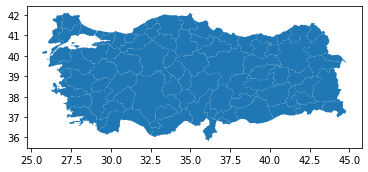

In [30]:
df_map.plot()

In [20]:
# Harita ve veri dataframelerini tek bir dataframe de birleştirme
df_merged = df_map.set_index('adm1_en').join(df_final)

In [21]:
df_merged.head(5)

,Shape_Leng,Shape_Area,adm0_en,geometry,Total,Women,Percentage
adm1_en,,,,,,,
ADANA,8.271786,1.407083,TURKEY,"POLYGON ((36.31587 38.36376, 36.31769 38.36367...",15,4,26.666667
ADIYAMAN,5.494422,0.750561,TURKEY,"POLYGON ((39.25297 38.18188, 39.25334 38.18159...",5,0,0.000000
AFYONKARAHISAR,7.149996,1.450064,TURKEY,"POLYGON ((31.14797 39.26246, 31.15825 39.25753...",6,1,16.666667
AGRI,6.588304,1.163170,TURKEY,"POLYGON ((43.28706 40.01281, 43.29129 40.00884...",4,1,25.000000
AKSARAY,4.432509,0.790388,TURKEY,"POLYGON ((33.96446 39.03804, 33.96453 39.03723...",4,1,25.000000


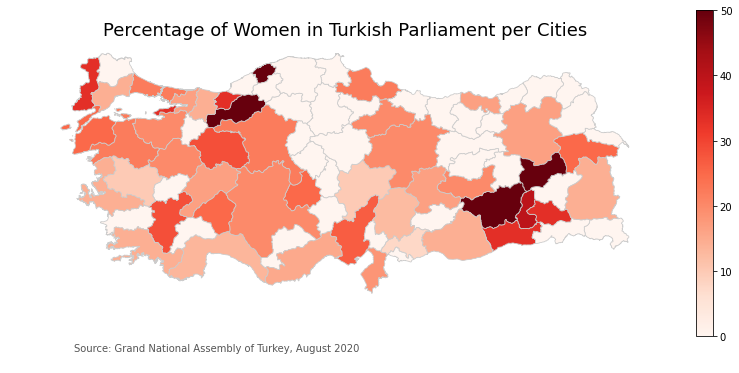

In [38]:
# Haritada kullanmak istediğimiz kolon ismi
percentage = 'Percentage'

# Renklendirmede kullanılacak maksimum ve minimum değerler
vmin, vmax = df_final["Percentage"].min(), df_final["Percentage"].max()

# Aksis ve harita ilgili diğer ayarlar
fig, ax = plt.subplots(1, figsize=(14, 6))
df_merged.plot(column=percentage, cmap='Reds', linewidth=0.8, ax=ax , edgecolor='0.8')
ax.axis('off')
ax.set_title('Percentage of Women in Turkish Parliament per Cities', \
              fontdict={'fontsize': '18',
                        'fontweight' : '2'})
ax.annotate('Source: Grand National Assembly of Turkey, August 2020',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [ ]:
# Haritayı dosya olarak kaydetme
fig.savefig('women_in_parliament.png', dpi=300)

In [36]:
# Kadın milletvekili olmayan iller
len(df_women.loc[df_women['Women'] == 0])

36

In [37]:
df_women.loc[df_women['Women'] == 0]

,Women
city_en,
ADIYAMAN,0
AMASYA,0
ARDAHAN,0
ARTVIN,0
AYDIN,0
BAYBURT,0
BILECIK,0
BINGOL,0
BITLIS,0
